# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.000,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,M,0,1,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,M,0,1,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,0,F,1,1,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,0,M,1,1,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,0,F,0,1,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,1,M,0,1,0,135000.000,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [6]:
app_train_corr_Target = app_train.corr()['TARGET']
app_train_corr_Target.shape

(110,)

In [7]:
app_train_corr_Target_abs = abs(app_train_corr_Target).sort_values()

In [8]:
print("The smallest correlation : \n")
for index in app_train_corr_Target_abs[:15].index:
    print("%-30s: %.6f"%(index,app_train_corr_Target.at[index]))
print("-"*40)
print("The largest correlation : \n")
for index in app_train_corr_Target_abs[-16:-1].index:
    print("%-30s: %.6f"%(index,app_train_corr_Target.at[index]))

The smallest correlation : 

FLAG_DOCUMENT_20              : 0.000215
FLAG_DOCUMENT_5               : -0.000316
FLAG_CONT_MOBILE              : 0.000370
FLAG_MOBIL                    : 0.000534
FLAG_DOCUMENT_12              : -0.000756
AMT_REQ_CREDIT_BUREAU_WEEK    : 0.000788
AMT_REQ_CREDIT_BUREAU_HOUR    : 0.000930
FLAG_DOCUMENT_19              : -0.001358
FLAG_DOCUMENT_10              : -0.001414
FLAG_DOCUMENT_7               : -0.001520
NONLIVINGAPARTMENTS_MODE      : -0.001557
FLAG_EMAIL                    : -0.001758
AMT_REQ_CREDIT_BUREAU_QRT     : -0.002022
SK_ID_CURR                    : -0.002108
FLAG_DOCUMENT_4               : -0.002672
----------------------------------------
The largest correlation : 

FLOORSMAX_AVG                 : -0.044003
FLAG_DOCUMENT_3               : 0.044346
REG_CITY_NOT_LIVE_CITY        : 0.044395
FLAG_EMP_PHONE                : 0.045982
DAYS_EMPLOYED_ANOM            : -0.045987
REG_CITY_NOT_WORK_CITY        : 0.050994
DAYS_ID_PUBLISH              

C:\Users\ChiWei-Weng\Anaconda3\envs\tensor-gpu\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\ChiWei-Weng\Anaconda3\envs\tensor-gpu\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\ChiWei-Weng\Anaconda3\envs\tensor-gpu\lib\site-packages\matplotlib\cbook\__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\ChiWei-Weng\Anaconda3\envs\tensor-gpu\lib\site-packages\matplotlib\cbook\__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\ChiWei-Weng\Anaconda3\envs\tensor-gpu\lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


TARGET
0    0.520969
1    0.390717
Name: EXT_SOURCE_3, dtype: float64
TARGET
0    227398
1     19148
Name: EXT_SOURCE_3, dtype: int64


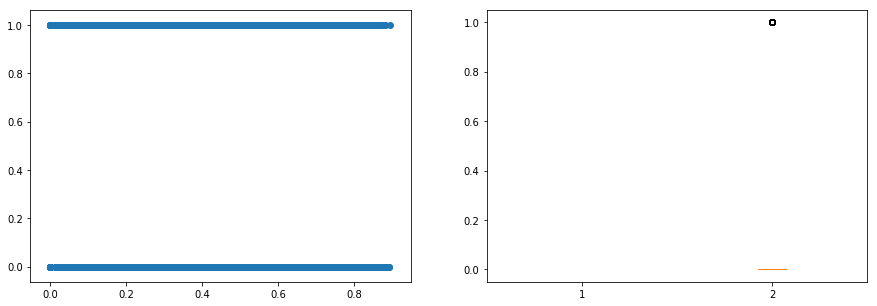

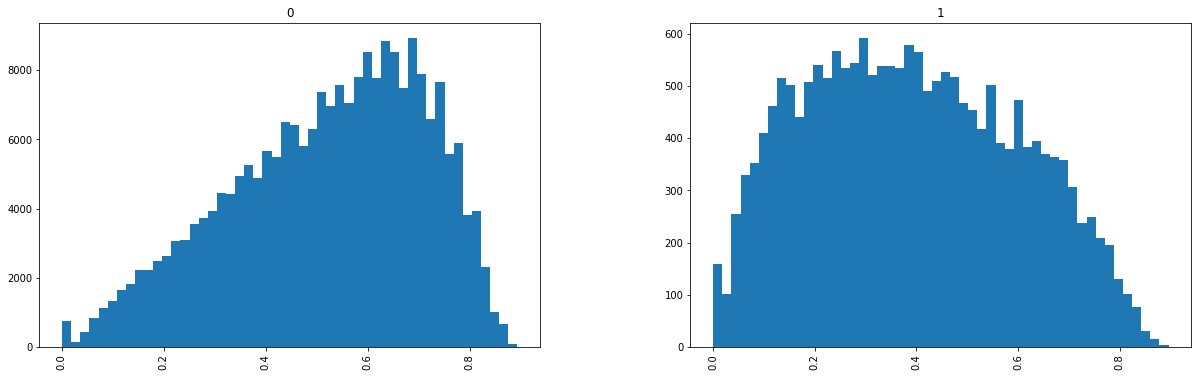

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(x=app_train['EXT_SOURCE_3'], y=app_train['TARGET'] )
plt.subplot(122)
plt.boxplot([app_train['EXT_SOURCE_3'],app_train['TARGET']] )

app_train.hist('EXT_SOURCE_3','TARGET',figsize=(20,6),bins=50)


print(app_train.groupby('TARGET').mean()['EXT_SOURCE_3'])
print(app_train.groupby('TARGET').count()['EXT_SOURCE_3'])

## EXT_SOURCE_3 對 TARGET 的相關性是最高的，
## 資料大部分在TARGET=0 從直方圖與盒鬚圖看來，相關性仍過低

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD27A3F278>,
      dtype=object)

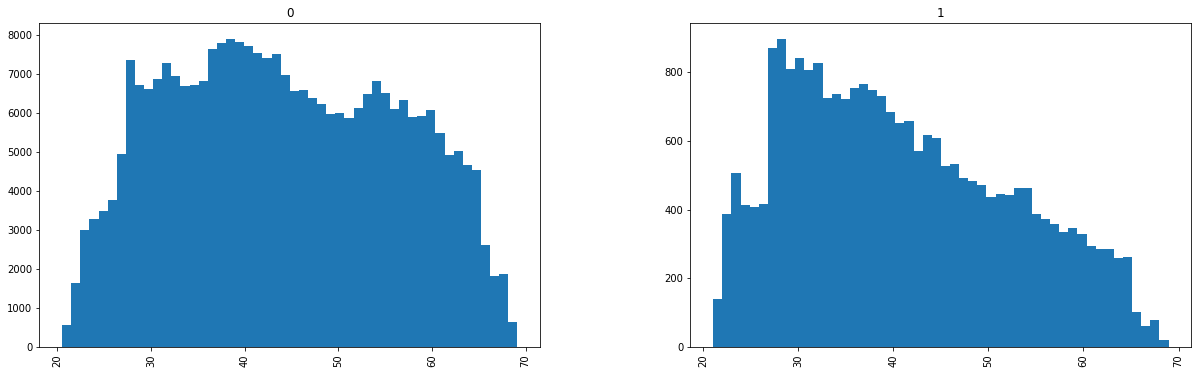

In [10]:
app_train['DAYS_BIRTH'].replace({365243: np.nan}, inplace = True) 
app_train['DAYS_BIRTH_YEAR'] = app_train['DAYS_BIRTH'] / (365)
app_train.hist('DAYS_BIRTH_YEAR','TARGET',figsize=(20,6),bins=50)

## 以年齡來看，TARGET=0 在高年齡層的分佈比TARGET=1多
## 資料量多分布在TARGET=0，使年齡與TARGET的相關性很低

In [70]:
app_train_corr = app_train.corr()

In [71]:
app_train_corr = app_train_corr[~ app_train_corr.isnull()]

In [92]:
app_train_corr_c = app_train_corr.copy()
app_train_corr_c = app_train_corr_c[(app_train_corr_c['CNT_CHILDREN']>0.2) | (app_train_corr_c['CNT_CHILDREN']<-0.2)].T
app_train_corr_c = app_train_corr_c[(app_train_corr_c['CNT_CHILDREN']>0.2) | (app_train_corr_c['CNT_CHILDREN']<-0.2)]

In [93]:
app_train_corr_c

,CNT_CHILDREN,DAYS_BIRTH,FLAG_EMP_PHONE,CNT_FAM_MEMBERS,DAYS_EMPLOYED_ANOM,DAYS_BIRTH_YEAR
CNT_CHILDREN,1.000000,-0.330938,0.240714,0.879161,-0.240722,-0.330938
DAYS_BIRTH,-0.330938,1.000000,-0.619888,-0.278894,0.619947,1.000000
FLAG_EMP_PHONE,0.240714,-0.619888,1.000000,0.233950,-0.999868,-0.619888
CNT_FAM_MEMBERS,0.879161,-0.278894,0.233950,1.000000,-0.233981,-0.278894
DAYS_EMPLOYED_ANOM,-0.240722,0.619947,-0.999868,-0.233981,1.000000,0.619947
DAYS_BIRTH_YEAR,-0.330938,1.000000,-0.619888,-0.278894,0.619947,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1dd27962b00>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd2796e208>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd279629b0>,
 'medians': [<matplotlib.lines.Line2D at 0x1dd2796e898>,
 'fliers': [<matplotlib.lines.Line2D at 0x1dd2796ebe0>,
 'means': []}

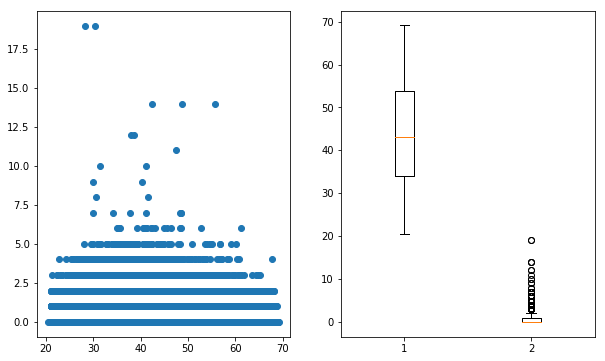

In [97]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.scatter(x=app_train['DAYS_BIRTH_YEAR'], y=app_train['CNT_CHILDREN'])
plt.subplot(122)
plt.boxplot([app_train['DAYS_BIRTH_YEAR'],app_train['CNT_CHILDREN']])